In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

## 1. Loading MNIST DATA and Checking

In [119]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [120]:
train_images.shape #60000 images(depth),28(rows),28(columns)

(60000, 28, 28)

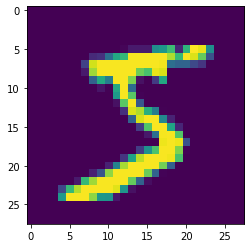

In [121]:
plt.imshow(train_images[0])

In [122]:
test_images.shape

(10000, 28, 28)

In [123]:
train_labels.shape

(60000,)

In [124]:
train_images.ndim

3

In [125]:
len(train_labels)

60000

In [126]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [127]:
train_images[0] #28*28

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

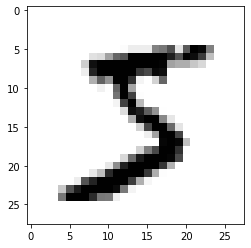

In [128]:
digit = train_images[0]
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

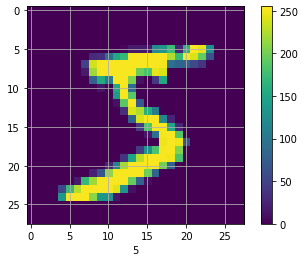

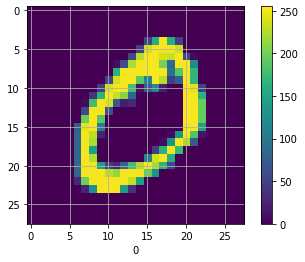

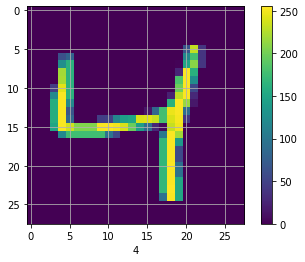

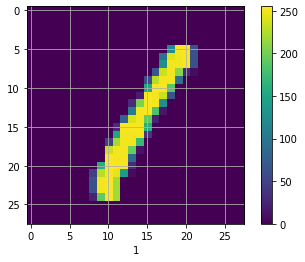

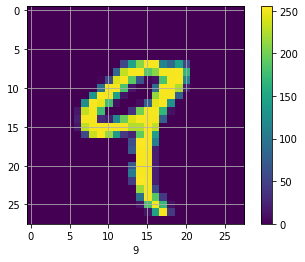

In [129]:
# show the first 2 images in the # training set 
for i in range(5):
    plt.figure() 
    plt.imshow(train_images[i]) 
    plt.colorbar() 
    plt.grid(True) 
    plt.xlabel(train_labels[i]) 
    plt.show()

# MODEL CREATION and TRAINING

In [130]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) #512 neurons .. 28*28=784 ,,, 784*512 
network.add(layers.Dense(10, activation='softmax')) #probability scores
#here we made 3 layers , first input layer (784 neurons) , second (512 neurons) and last layer with 10 neurons
#conventionally -> we don't count input layer in layers counting
#densely connected -> previous neurons are connected with after coming neurons
#dense layer accepts input as a vector (1D) here 28*28 dim 1D
#first layer is input , last layer is output , middle ones are hidden layers

In [131]:
network.compile(optimizer='rmsprop', #optimizer->to adjust weight
loss='categorical_crossentropy',  #multiclass
metrics=['accuracy']) #can be -> accuracy,precision,recall


Normalizing the Data
You also need to convert the values of the images from a range of 0 to 255 to a new range of 0 to 1. 

In [132]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [133]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [134]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [135]:
history = network.fit(train_images, train_labels, epochs=6, batch_size=128)

Train on 60000 samples
Epoch 1/6
60000/60000 [==============================] - 7s 123us/sample - loss: 0.2570 - acc: 0.9257
Epoch 2/6
60000/60000 [==============================] - 7s 122us/sample - loss: 0.1042 - acc: 0.9697
Epoch 3/6
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0687 - acc: 0.9799s - l
Epoch 4/6
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0500 - acc: 0.9851s - lo
Epoch 5/6
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0374 - acc: 0.9888s - loss: 0.0380 -  - ETA: 1s - loss: 0.0 - ETA: 0s - loss: 0.0377 - 
Epoch 6/6
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0287 - acc: 0.9915


In [138]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc: ',test_acc)

10000/10000 [==============================] - 1s 112us/sample - loss: 0.0613 - acc: 0.9830
test_acc:  0.983


dict_keys(['loss', 'acc'])


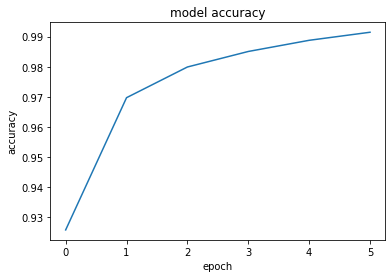

In [155]:
# list all data in history
print(history.history.keys())
plt.plot(history.history['acc'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

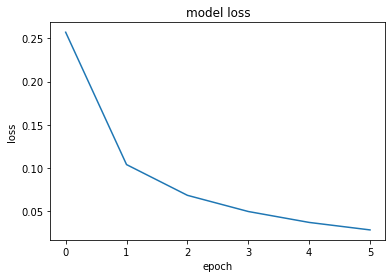

In [157]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [144]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


(10000, 784)
(784,)
(1, 784)


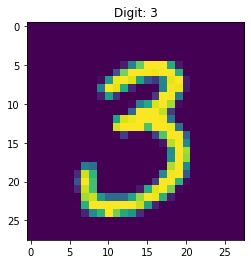

In [153]:
index = 90
# shape of X_test
print(test_images.shape) # (10000, 784)
# shape of the first item in X_test
print(test_images[index].shape)# (784,)
# in order to do prediction, you need # to send in a 2-d array of shape (,784)
x = test_images[index].reshape(-1,784)
print(x.shape) # (1,784)
# show the number
plt.title("Digit: {}".format(test_labels[index].argmax()))
plt.imshow(test_images[index].reshape(28,28), interpolation='none')


In [154]:
print(network.predict(x))

[[4.6057446e-11 5.3708293e-10 3.4817713e-08 9.9998057e-01 4.0039678e-14
  7.7372630e-07 5.4155323e-15 7.4172248e-12 1.5085243e-05 3.5651742e-06]]


In [158]:
print(network.predict_classes(x))

[3]


In [161]:
print(test_labels[index])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## Saving the Trained Model

In [159]:
# creates a HDF5 file 'trained_model.h5'
network.save('trained_model.h5')

## Loading the Saved Model

In [162]:
from tensorflow.keras.models import load_model
# returns a compiled model identical to # the previous one
model = load_model('trained_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## TESTING OWN IMAGE OF NUMBER 6

(28, 28)


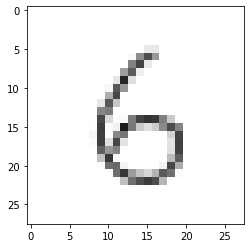

In [204]:
from skimage import io
from skimage.color import rgb2gray
original= io.imread("6.png")
plt.imshow(original)
grayscale = rgb2gray(original)
print(grayscale.shape)

In [197]:
final = network.predict(grayscale.reshape(-1,784))
print(final)
print(final.argmax())

[[1.18159574e-35 0.00000000e+00 1.00000000e+00 8.38181721e-32
  0.00000000e+00 1.79936469e-19 1.35106657e-15 6.73455184e-17
  0.00000000e+00 0.00000000e+00]]
2


In [198]:
print(model.predict_classes(grayscale.reshape(-1,784)))

[2]
